In [310]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [311]:
df = pd.read_csv('../Data/4.KMeans_dataset.csv')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,38.71,82.82,27.289810,2,27.289810,2,1.303348,3
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,141.46,141.46,14.162002,1,14.162002,1,1.601216,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,179.12,179.12,13.051752,1,13.051752,1,1.647432,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,72.20,72.20,25.737451,1,25.737451,1,1.457031,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationer

In [312]:
df['order_status'] = df['order_status'].replace('delivered', 7)
df['order_status'] = df['order_status'].replace('shipped', 6)
df['order_status'] = df['order_status'].replace('processing', 5)
df['order_status'] = df['order_status'].replace('invoiced', 4)
df['order_status'] = df['order_status'].replace('approved', 3)
df['order_status'] = df['order_status'].replace('created', 2)
df['order_status'] = df['order_status'].replace('canceled', 1)
df['order_status'] = df['order_status'].replace('unavailable', 0)

index_noScore = df[df['review_score'] == 'no score'].index
df.drop(index_noScore, inplace=True)

df['review_score'] = df['review_score'].astype('float')

labelencoder = LabelEncoder()
df['product_category_name_english'] = labelencoder.fit_transform(df['product_category_name_english'])

In [313]:
df_ARI = []
df_ARI = pd.DataFrame(df_ARI)
df_ARI['customer_unique_id'] = df['customer_unique_id']
df_ARI['order_purchase_timestamp'] = df['order_purchase_timestamp']
df_ARI['order_status'] = df['order_status']
df_ARI['product_category_name_english'] = df['product_category_name_english']
df_ARI['Recency'] = df['Recency_y']
df_ARI['Frequency'] = df['Frequency_y']
df_ARI['Monetary'] = df['Monetary']
df_ARI['Cluster'] = df['Cluster']
df_ARI

,customer_unique_id,order_purchase_timestamp,order_status,product_category_name_english,Recency,Frequency,Monetary,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,7,49,27.289810,2,1.303348,3
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,7,60,14.162002,1,1.601216,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,7,5,13.051752,1,1.647432,0
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,7,61,25.737451,1,1.457031,1
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,7,67,22.505471,1,1.220373,0
...,...,...,...,...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,7,43,33.093157,1,1.494089,1
96092,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,7,6,22.786720,1,1.663569,0
96093,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,7,45,28.407875,1,1.723809,1
96094,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,7,15,23.908753,1,1.686544,1


In [314]:
df_ARI = df_ARI.sort_values(by='order_purchase_timestamp')
df_ARI

,customer_unique_id,order_purchase_timestamp,order_status,product_category_name_english,Recency,Frequency,Monetary,Cluster
4536,b7d76e111c89f7ebf14761390f0f7d17,2016-09-04 21:15:19,6,39,37.380079,1,1.455305,1
4391,4854e9b3feff728c13ee5fc7d1547e92,2016-09-05 00:15:34,1,57,37.358694,1,0.000000,2
10037,009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,1,57,37.187047,1,0.000000,2
30350,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,7,43,37.143977,1,1.357931,1
80714,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02 22:07:52,1,57,36.775265,1,0.000000,2
...,...,...,...,...,...,...,...,...
1801,08642cd329066fe11ec63293f714f2f8,2018-09-20 13:54:16,1,57,9.015414,2,0.000000,2
33546,9c3af16efacb7aa06aa3bc674556c5d6,2018-09-25 11:59:18,1,57,8.405957,2,0.000000,2
49501,9bb92bebd4cb7511e1a02d5e50bc4655,2018-09-29 09:13:03,1,57,7.882219,1,0.000000,2
66750,262e1f1e26e92e86375f86840b4ffd63,2018-10-16 20:16:02,1,57,5.071228,2,0.000000,2


In [315]:
df_train = df_ARI.iloc[:50000].copy()
df_test = df_ARI.iloc[50000:].copy()

In [316]:
df_test['order_purchase_timestamp'] = pd.to_datetime(df_test['order_purchase_timestamp'])
df_train['order_purchase_timestamp'] = pd.to_datetime(df_train['order_purchase_timestamp'])

In [317]:
from sklearn import cluster, metrics
from sklearn import preprocessing

df_train = df_train.drop('order_purchase_timestamp', axis=1)
df_train = df_train.drop('customer_unique_id', axis=1)
X = df_train.drop('Cluster', axis=1)
X_norm1 = preprocessing.scale(X)

In [318]:
cls1 = cluster.KMeans(n_clusters=5)
cls1.fit(X_norm1)

KMeans(n_clusters=5)

In [320]:
from sklearn.metrics import adjusted_rand_score

testX = []
time = 5

df_test = df_test.drop('Cluster', axis=1)

date_max = df_test['order_purchase_timestamp'].max()
start_date = df_test['order_purchase_timestamp'].min()

i = df_test['order_purchase_timestamp'].min()

while i < date_max:
    df_train_2 = df_ARI.iloc[:50000].copy()

    start_date = df_test['order_purchase_timestamp'].min()
    end_date = start_date + pd.Timedelta(days=time)

    df_sample_date = df_test.loc[df_test['order_purchase_timestamp'].between(start_date, end_date)]
    df_train_2 = pd.concat([df_train_2, df_sample_date], ignore_index=True)

    df_train_2 = df_train_2.drop('order_purchase_timestamp', axis=1)
    df_train_2 = df_train_2.drop('customer_unique_id', axis=1)

    X2 = df_train_2.drop('Cluster', axis=1)
    X_norm2 = preprocessing.scale(X2)

    cls2 = cluster.KMeans(n_clusters=5)
    cls2.fit(X_norm2)
    algo1 = cls2.predict(X_norm2)
    algo2 = cls1.predict(X_norm2)

    ari_score = adjusted_rand_score(cls2.labels_, algo2)

    testX.append(ari_score)
    time+=5
    i = df_test['order_purchase_timestamp'].min() + pd.Timedelta(days=time)

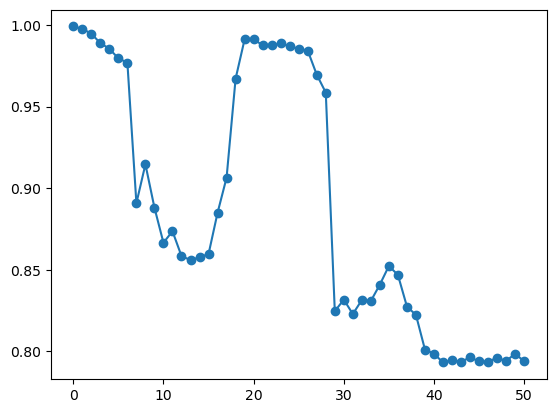

In [321]:
plt.plot(testX, marker='o')
plt.show()